In [87]:
import os
import sys
sys.path.append(os.path.abspath(".."))

Load the MNIST dataset

In [88]:
from utils.data_loader import load_mnist_data

# Load MNIST
(train_images, train_labels), (test_images, test_labels) = load_mnist_data()
print(f"MNIST shapes: {train_images.shape}, {train_labels.shape}, {test_images.shape}, {test_labels.shape}")

MNIST shapes: (60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,)


Plot a few samples to check all is good

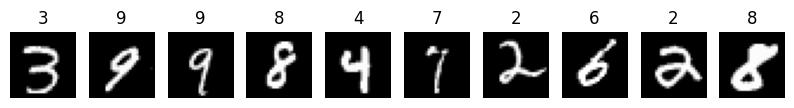

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_samples(images, labels, num_samples=10):
    indices = np.random.choice(len(images), num_samples, replace=False)
    plt.figure(figsize=(num_samples, 2))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[idx].reshape(28,28), cmap='gray')
        plt.title(f"{labels[idx]}")
        plt.axis("off")
    plt.show()

plot_samples(train_images, train_labels)

Train the small proof-of-concept model LesNet

In [90]:
from utils.train_utils import train_model

lenet, lenet_history = train_model(model_name='lenet', epochs=10)

c:\Users\sonia\anaconda3\envs\fragile_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7730 - loss: 0.7563 - val_accuracy: 0.9727 - val_loss: 0.0919
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9716 - loss: 0.0922 - val_accuracy: 0.9816 - val_loss: 0.0598
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9785 - loss: 0.0701 - val_accuracy: 0.9848 - val_loss: 0.0469
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9824 - loss: 0.0564 - val_accuracy: 0.9882 - val_loss: 0.0385
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9856 - loss: 0.0449 - val_accuracy: 0.9894 - val_loss: 0.0336
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9879 - loss: 0.0386 - val_accuracy: 0.9876 - val_loss: 0.0372
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9899 - loss: 0.0333 - val_accuracy: 0.9887 - val_loss: 0.0357
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9910 - loss: 0.0276 - val_acc

Select a subset of 100 training points for this study

In [91]:
np.random.seed(7)
subset_size = 100
all_indices = np.arange(len(train_images))
subset_indices = np.random.choice(all_indices, subset_size, replace=False)
train_images_subset = train_images[subset_indices]
train_labels_subset = train_labels[subset_indices]

In [214]:
from utils.ground_truth_influence import compute_ground_truth_influences

# Select a test sample 
test_index = 0
test_sample = test_images[test_index]
test_label = test_labels[test_index]

ground_truth_influences = compute_ground_truth_influences(
    lenet, train_images_subset, train_labels_subset, test_sample, test_label,
    sample_indices=list(range(subset_size)), fine_tune_epochs=1, batch_size=128
)

print(ground_truth_influences)

[ 2.4079825e-05  2.4079825e-05  2.4079825e-05  2.4079825e-05
  2.4079825e-05  2.4079825e-05  2.4079825e-05  2.4079825e-05
  2.6225523e-05  2.4079825e-05  2.4079825e-05  2.1934122e-05
  2.4079825e-05  2.4079825e-05  2.4079825e-05  2.4079825e-05
  2.4079825e-05  2.4079825e-05  2.4079825e-05  2.5033471e-05
  2.4079825e-05  2.4079825e-05  2.4079825e-05  2.4079825e-05
  2.4079825e-05  2.4079825e-05  2.4079825e-05  2.4079825e-05
  2.4079825e-05  2.4079825e-05  2.4079825e-05  2.4079825e-05
  2.4079825e-05  2.4079825e-05  2.4079825e-05  2.4079825e-05
  2.4079825e-05  2.4079825e-05  2.4079825e-05  2.4079825e-05
  2.4079825e-05  2.4079825e-05  2.4079825e-05  2.4079825e-05
  2.4079825e-05  2.4079825e-05  2.4079825e-05  2.4079825e-05
  2.4079825e-05  2.4079825e-05  2.4079825e-05  2.4079825e-05
  2.4079825e-05  2.4079825e-05  2.4079825e-05  2.6344729e-05
  2.4079825e-05  2.5033471e-05  2.3960620e-05  2.4199031e-05
  2.4079825e-05  2.4079825e-05  2.4079825e-05  1.9907620e-05
  2.4199031e-05  2.40798

In [215]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import tensorflow as tf

from utils.influence_functions import compute_influence_and_meta_on_dataset

# Define loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compute standard influence estimates on a subset of training data (first 10 samples)
std_influences, meta_influences = compute_influence_and_meta_on_dataset(
    lenet, train_images_subset, train_labels_subset, test_sample, test_label, loss_fn,
    damping=0.1, sample_indices=list(range(subset_size)), epsilon=1e-3
)

std_influences = -std_influences

scaling_factor = np.median(np.abs(ground_truth_influences)) / np.median(np.abs(std_influences))
std_influences = std_influences * scaling_factor

print(std_influences)

[ 1.14813474e-08  2.16288663e-05  1.62374577e-04  7.22165406e-03
 -1.14853347e-05  8.95506892e-05 -7.96915344e-07  7.74470027e-06
  1.21221147e-01  1.93514734e-05  1.20460463e-05 -3.50145772e-02
  3.87971397e-07 -1.76730719e-05  9.08491347e-05  1.77371328e-06
  2.46999225e-05 -1.04437840e-05  4.34773467e-10 -6.03488705e-04
  8.71148732e-05  2.59678345e-03  1.16696661e-04 -3.44646396e-04
 -7.48313541e-05  1.29068803e-05  2.57826050e-05  1.23234582e-04
 -1.18413618e-06  1.84606961e-05  2.96061364e-04 -1.10505513e-04
  2.42986766e-06  6.06613758e-04  3.53568481e-07  8.86854890e-04
 -6.66663664e-06  1.08880010e-06  3.03616912e-06 -5.06413267e-09
  9.88769443e-07 -1.28521406e-05  2.86452132e-06  4.29766107e-04
  1.66278533e-05 -1.35394093e-03 -7.49249466e-06  1.41955366e-06
 -1.03090306e-05  4.31890476e-05 -2.79754815e-08 -5.91699688e-07
  8.65257287e-04 -8.00510770e-06 -6.62445731e-04  1.31139457e-01
 -1.84597287e-04  3.27822305e-02 -2.74573197e-03 -3.95078212e-02
 -3.80632664e-05 -6.45412

In [216]:
meta_influences = -meta_influences*scaling_factor
print(meta_influences)

[ 1.61544463e-07  8.61400738e-04  1.47611331e-02  4.55420017e-02
  1.20153767e-03  1.28396368e-03 -2.65924667e-04 -1.60423137e-04
  1.09197915e+00  1.48211868e-04 -3.33620392e-06  1.64883286e-01
  1.29901709e-05  6.64154417e-04  2.45339447e-03  6.81015592e-07
  6.82061014e-04  4.54668934e-03  7.75222375e-09 -6.28583789e-01
  8.68454459e-04  5.02176583e-02  6.71448826e-04  4.15249402e-03
  1.75052718e-03  3.87233704e-05  6.43733481e-04  2.26689316e-03
 -1.25156953e-06  5.73318161e-04  2.13559124e-05 -6.93551672e-04
  4.13696835e-05  2.20081620e-05  5.53514183e-05  2.05090810e-02
  1.03793158e-04  9.02892134e-06  2.31913175e-04 -1.20604540e-07
  1.98333673e-05 -4.17287170e-04  4.58843097e-05  1.19197974e-02
  6.20374805e-04 -6.89737499e-02  4.21648409e-04  1.28612173e-05
  8.40514258e-05  5.77587984e-04 -7.82076803e-09 -1.02376303e-04
 -1.24284262e-02  9.29113652e-04 -3.18381935e-04 -3.84838486e+00
  2.50340719e-02  1.12354028e+00  9.26167443e-02 -6.08912528e-01
  2.28923789e-04  4.18690

In [217]:
pearson_corr, _ = pearsonr(std_influences, ground_truth_influences)
spearman_corr, _ = spearmanr(std_influences, ground_truth_influences)
print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)

Pearson correlation: 0.97674286
Spearman correlation: 0.3226280101631875


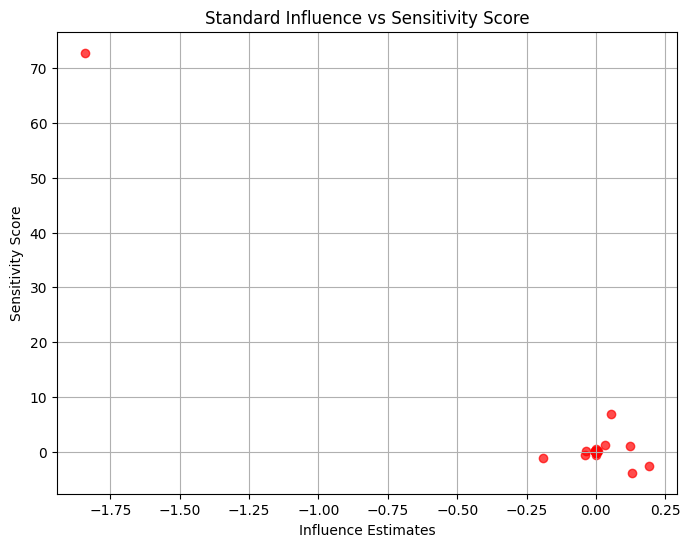

In [218]:
plt.figure(figsize=(8,6))
plt.scatter(std_influences, meta_influences, color='red', alpha=0.7)
plt.xlabel("Influence Estimates")
plt.ylabel("Sensitivity Score")
plt.title("Standard Influence vs Sensitivity Score")
plt.grid(True)
plt.show()

In [219]:
top_k = 10
top_indices = np.argsort(np.abs(std_influences))[-top_k:][::-1]  # Sort by magnitude (descending)

def plot_top_influential(images, labels, scores, meta_scores, indices, title, variant="normal"):
    plt.figure(figsize=(top_k, 2.5))
    for i, idx in enumerate(indices):
        plt.subplot(1, top_k, i + 1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        if(variant == "adjusted"):
            plt.title(f"Inf:{scores[idx]:.2f}\nPrev={meta_scores[idx]:.2f}", fontsize=8)
        else:
            plt.title(f"Inf:{scores[idx]:.2f}\nμ={meta_scores[idx]:.2f}", fontsize=8)
        plt.axis("off")
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

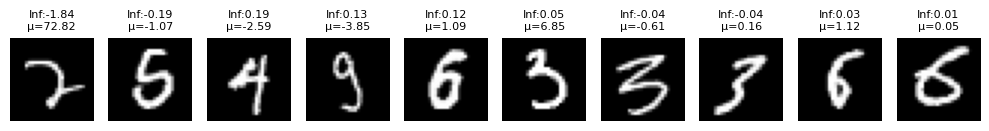

In [220]:
plot_top_influential(train_images_subset, train_labels_subset, std_influences, meta_influences, top_indices, "")

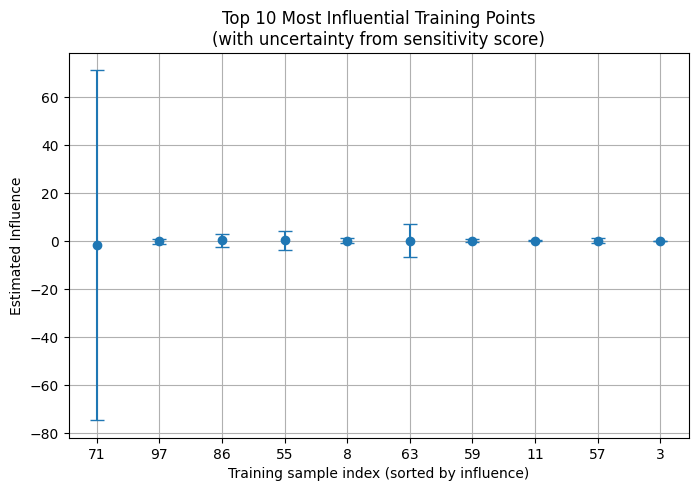

In [221]:
import numpy as np
import matplotlib.pyplot as plt

top10_std = std_influences[top_indices]
top10_meta = meta_influences[top_indices]

plt.figure(figsize=(8, 5))
plt.errorbar(np.arange(10), top10_std, yerr=np.abs(top10_meta), fmt='o', capsize=5)
plt.xticks(np.arange(10), top_indices)
plt.xlabel("Training sample index (sorted by influence)")
plt.ylabel("Estimated Influence")
plt.title("Top 10 Most Influential Training Points\n(with uncertainty from sensitivity score)")
plt.grid(True)
plt.show()


Best Pearson threshold: 0.172 (r = 0.967)
Best Spearman threshold: 0.579 (ρ = 0.335)
Best Trade-off threshold: 0.579 (r = 0.966, ρ = 0.335)


C:\Users\sonia\AppData\Local\Temp\ipykernel_2708\2133860535.py:21: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  p_corr, _ = pearsonr(std_filtered, gt_filtered)
C:\Users\sonia\AppData\Local\Temp\ipykernel_2708\2133860535.py:22: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  s_corr, _ = spearmanr(std_filtered, gt_filtered)


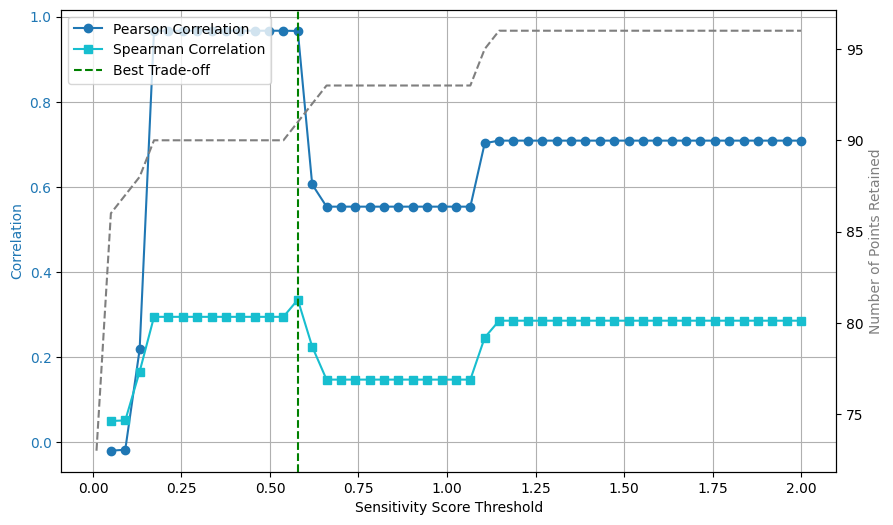

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

thresholds = np.linspace(0.01, 2.0, 50)
pearson_corrs = []
spearman_corrs = []
num_points_retained = []

for t in thresholds:
    mask = np.abs(meta_influences) < t
    retained = np.sum(mask)
    num_points_retained.append(retained)

    if retained < 2:
        pearson_corrs.append(np.nan)
        spearman_corrs.append(np.nan)
    else:
        std_filtered = std_influences[mask]
        gt_filtered = ground_truth_influences[mask]
        p_corr, _ = pearsonr(std_filtered, gt_filtered)
        s_corr, _ = spearmanr(std_filtered, gt_filtered)
        pearson_corrs.append(p_corr)
        spearman_corrs.append(s_corr)

# Find best
pearson_corrs = np.array(pearson_corrs)
spearman_corrs = np.array(spearman_corrs)

best_pearson_idx = np.nanargmax(pearson_corrs)
best_spearman_idx = np.nanargmax(spearman_corrs)

# Trade-off: Spearman + Pearson
combined = pearson_corrs + spearman_corrs
best_tradeoff_idx = np.nanargmax(combined)

print(f"Best Pearson threshold: {thresholds[best_pearson_idx]:.3f} (r = {pearson_corrs[best_pearson_idx]:.3f})")
print(f"Best Spearman threshold: {thresholds[best_spearman_idx]:.3f} (ρ = {spearman_corrs[best_spearman_idx]:.3f})")
print(f"Best Trade-off threshold: {thresholds[best_tradeoff_idx]:.3f} (r = {pearson_corrs[best_tradeoff_idx]:.3f}, ρ = {spearman_corrs[best_tradeoff_idx]:.3f})")

fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:blue'
ax1.set_xlabel("Sensitivity Score Threshold")
ax1.set_ylabel("Correlation", color=color1)
ax1.plot(thresholds, pearson_corrs, label="Pearson Correlation", marker="o", color=color1)
ax1.plot(thresholds, spearman_corrs, label="Spearman Correlation", marker="s", color="tab:cyan")
ax1.axvline(thresholds[best_tradeoff_idx], linestyle='--', color='green', label='Best Trade-off')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.legend(loc="upper left")
ax1.grid(True)

ax2 = ax1.twinx()
color2 = 'tab:gray'
ax2.set_ylabel("Number of Points Retained", color=color2)
ax2.plot(thresholds, num_points_retained, label="# Points Retained", linestyle="--", color=color2)


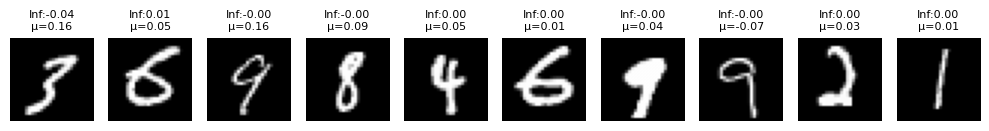

In [223]:
best_mask = np.abs(meta_influences) < thresholds[best_tradeoff_idx]

filtered_std = std_influences[best_mask]
filtered_meta = meta_influences[best_mask]
filtered_images = train_images_subset[best_mask]
filtered_labels = train_labels_subset[best_mask]

top_indices = np.argsort(np.abs(filtered_std))[-top_k:][::-1]

plot_top_influential(filtered_images, filtered_labels, filtered_std, filtered_meta, top_indices, title="")


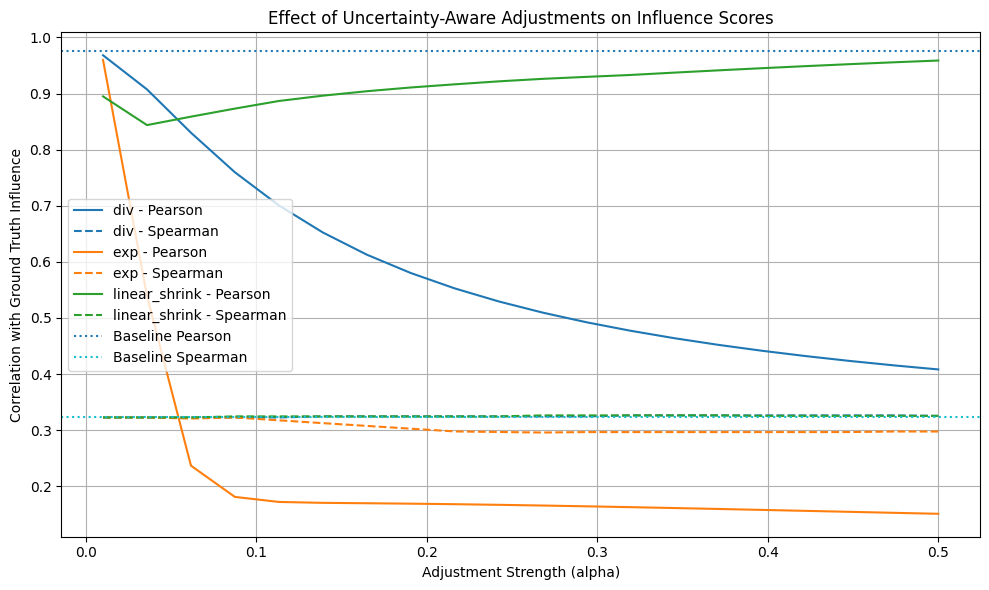

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

adjustment_strengths = np.linspace(0.01, 0.5, 20)
strategies = ['div', 'exp', 'linear_shrink']

results = {s: {'pearson': [], 'spearman': []} for s in strategies}

for alpha in adjustment_strengths:
    # Strategies
    adj1 = std_influences / (1 + alpha * np.abs(meta_influences))  
    adj2 = std_influences * np.exp(-alpha * np.abs(meta_influences))  
    adj3 = std_influences * np.clip((1 - alpha * np.abs(meta_influences)), 0.2, 1.0)  # linear_shrink

    for name, adj in zip(strategies, [adj1, adj2, adj3]):
        p_corr, _ = pearsonr(adj, ground_truth_influences)
        s_corr, _ = spearmanr(adj, ground_truth_influences)
        results[name]['pearson'].append(p_corr)
        results[name]['spearman'].append(s_corr)

# Baseline
pearson_base, _ = pearsonr(std_influences, ground_truth_influences)
spearman_base, _ = spearmanr(std_influences, ground_truth_influences)

strategy_colors = {
    'div': 'tab:blue',
    'exp': 'tab:orange',
    'linear_shrink': 'tab:green'
}

# Plotting
plt.figure(figsize=(10, 6))
for name in strategies:
    color = strategy_colors[name]
    # Plot Pearson with solid line
    plt.plot(adjustment_strengths, results[name]['pearson'], 
             color=color, linestyle='-', label=f'{name} - Pearson')
    # Plot Spearman with dashed line using the same color
    plt.plot(adjustment_strengths, results[name]['spearman'], 
             color=color, linestyle='--', label=f'{name} - Spearman')

# Baseline lines (unchanged from original)
plt.axhline(pearson_base, linestyle=':', color='tab:blue', label='Baseline Pearson')
plt.axhline(spearman_base, linestyle=':', color='tab:cyan', label='Baseline Spearman')

plt.xlabel("Adjustment Strength (alpha)")
plt.ylabel("Correlation with Ground Truth Influence")
plt.title("Effect of Uncertainty-Aware Adjustments on Influence Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Best alpha: 0.5
Associated Pearson score: 0.9589067055932224
Associated Spearman score: 0.325393165756521


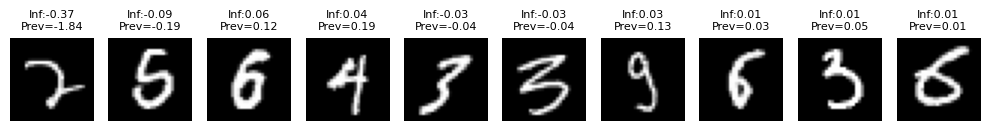

In [ ]:
strategy = "linear_shrink"
avg_corrs = np.array(results['startegy']['pearson']) + np.array(results['strategy']['spearman'])
best_idx = np.argmax(avg_corrs)
best_alpha = adjustment_strengths[best_idx]

best_pearson = results['strategy']['pearson'][best_idx]
best_spearman = results['strategy']['spearman'][best_idx]

print("Best alpha:", best_alpha)
print("Associated Pearson score:", best_pearson)
print("Associated Spearman score:", best_spearman)

adjusted_scores = std_influences * np.clip((1 - best_alpha * np.abs(meta_influences)), 0.2, 1.0)

top_indices = np.argsort(-np.abs(adjusted_scores))[:top_k]
plot_top_influential(train_images_subset, train_labels_subset, adjusted_scores, std_influences, top_indices, title="", variant="adjusted")
